In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Consolidación de DataSet

In [4]:
df_cards = pd.read_csv('./dataSet/cards_data.csv')
df_users = pd.read_csv('./dataSet/users_data.csv')
df_transactions = pd.read_csv('./dataSet/transactions_data.csv')
with open('./dataSet/mcc_codes.json', 'r') as file:
    mcc_codes = json.load(file)

In [5]:
df_cards.head(2)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No


In [6]:
df_users.head(2)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5


In [7]:
df_transactions.head(2)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.00,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.00,5311,NaN


## Se identifican las llaves de cruce para consolidar un solo dataFame

- client_id
- card_id

In [8]:
df_cards.rename(columns = {'id': 'card_id'}, inplace=True)
df_users.rename(columns = {'id': 'client_id'}, inplace=True)

In [9]:
# Se realiza un left join entre df_transactions y df_cards para obtener la información de las tarjetas
df_transactions = df_transactions.merge(df_cards, how='left', on='card_id')
df_transactions.drop(columns=['client_id_y'], inplace=True)
df_transactions.rename(columns = {'client_id_x': 'client_id'}, inplace=True)

In [10]:
df_transactions.shape

(13305915, 23)

In [11]:
df_users.shape

(2000, 14)

In [12]:
# Se realiza un left join entre df_transactions y df_users para obtener la información de los usuarios
df_transactions = df_transactions.merge(df_users, how='left', on='client_id')
df_transactions.shape

(13305915, 36)

## Solo falta categorizar las transacciones con el código MCC

In [13]:
mcc_codes

{'5812': 'Eating Places and Restaurants',
 '5541': 'Service Stations',
 '7996': 'Amusement Parks, Carnivals, Circuses',
 '5411': 'Grocery Stores, Supermarkets',
 '4784': 'Tolls and Bridge Fees',
 '4900': 'Utilities - Electric, Gas, Water, Sanitary',
 '5942': 'Book Stores',
 '5814': 'Fast Food Restaurants',
 '4829': 'Money Transfer',
 '5311': 'Department Stores',
 '5211': 'Lumber and Building Materials',
 '5310': 'Discount Stores',
 '3780': 'Computer Network Services',
 '5499': 'Miscellaneous Food Stores',
 '4121': 'Taxicabs and Limousines',
 '5300': 'Wholesale Clubs',
 '5719': 'Miscellaneous Home Furnishing Stores',
 '7832': 'Motion Picture Theaters',
 '5813': 'Drinking Places (Alcoholic Beverages)',
 '4814': 'Telecommunication Services',
 '5661': 'Shoe Stores',
 '5977': 'Cosmetic Stores',
 '8099': 'Medical Services',
 '7538': 'Automotive Service Shops',
 '5912': 'Drug Stores and Pharmacies',
 '4111': 'Local and Suburban Commuter Transportation',
 '5815': 'Digital Goods - Media, Books,

In [14]:
df_transactions['mcc'] = df_transactions['mcc'].astype(str)

In [15]:
# Categorización de las transacciones con el código MCC
df_transactions['mcc_code'] = df_transactions['mcc'].map(mcc_codes)

In [16]:
df_transactions.loc[df_transactions['mcc_code'].isnull()]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,mcc_code


# Exploración de datos

In [17]:
df_transactions.shape

(13305915, 37)

In [18]:
df_transactions.head(2)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,mcc_code
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.00,5499,NaN,Mastercard,Debit (Prepaid),5497590243197280,07/2022,306,YES,2,$55,05/2008,2008,No,30,67,1989,7,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.00,5311,NaN,Mastercard,Credit,5175842699412235,12/2024,438,YES,1,$9100,09/2005,2015,No,48,67,1971,6,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5,Department Stores


In [19]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 37 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   date                   object 
 2   client_id              int64  
 3   card_id                int64  
 4   amount                 object 
 5   use_chip               object 
 6   merchant_id            int64  
 7   merchant_city          object 
 8   merchant_state         object 
 9   zip                    float64
 10  mcc                    object 
 11  errors                 object 
 12  card_brand             object 
 13  card_type              object 
 14  card_number            int64  
 15  expires                object 
 16  cvv                    int64  
 17  has_chip               object 
 18  num_cards_issued       int64  
 19  credit_limit           object 
 20  acct_open_date         object 
 21  year_pin_last_changed  int64  
 22  card_on_dark_web

In [20]:
df_transactions.isnull().sum()

id                              0
date                            0
client_id                       0
card_id                         0
amount                          0
use_chip                        0
merchant_id                     0
merchant_city                   0
merchant_state            1563700
zip                       1652706
mcc                             0
errors                   13094522
card_brand                      0
card_type                       0
card_number                     0
expires                         0
cvv                             0
has_chip                        0
num_cards_issued                0
credit_limit                    0
acct_open_date                  0
year_pin_last_changed           0
card_on_dark_web                0
current_age                     0
retirement_age                  0
birth_year                      0
birth_month                     0
gender                          0
address                         0
latitude      

In [21]:
df_transactions.isnull().mean()*100

id                       0.00
date                     0.00
client_id                0.00
card_id                  0.00
amount                   0.00
use_chip                 0.00
merchant_id              0.00
merchant_city            0.00
merchant_state          11.75
zip                     12.42
mcc                      0.00
errors                  98.41
card_brand               0.00
card_type                0.00
card_number              0.00
expires                  0.00
cvv                      0.00
has_chip                 0.00
num_cards_issued         0.00
credit_limit             0.00
acct_open_date           0.00
year_pin_last_changed    0.00
card_on_dark_web         0.00
current_age              0.00
retirement_age           0.00
birth_year               0.00
birth_month              0.00
gender                   0.00
address                  0.00
latitude                 0.00
longitude                0.00
per_capita_income        0.00
yearly_income            0.00
total_debt

In [22]:
df_transactions["mcc_code"].value_counts().sort_values(ascending=False).head(25)

mcc_code
Grocery Stores, Supermarkets                  1592584
Miscellaneous Food Stores                     1460875
Service Stations                              1424711
Eating Places and Restaurants                  999738
Drug Stores and Pharmacies                     772913
Tolls and Bridge Fees                          674135
Wholesale Clubs                                601942
Money Transfer                                 589140
Taxicabs and Limousines                        500662
Fast Food Restaurants                          499659
Automotive Service Shops                       478263
Department Stores                              475384
Drinking Places (Alcoholic Beverages)          248570
Discount Stores                                246545
Utilities - Electric, Gas, Water, Sanitary     242993
Book Stores                                    232387
Telecommunication Services                     218243
Lumber and Building Materials                  173261
Motion Picture Thea

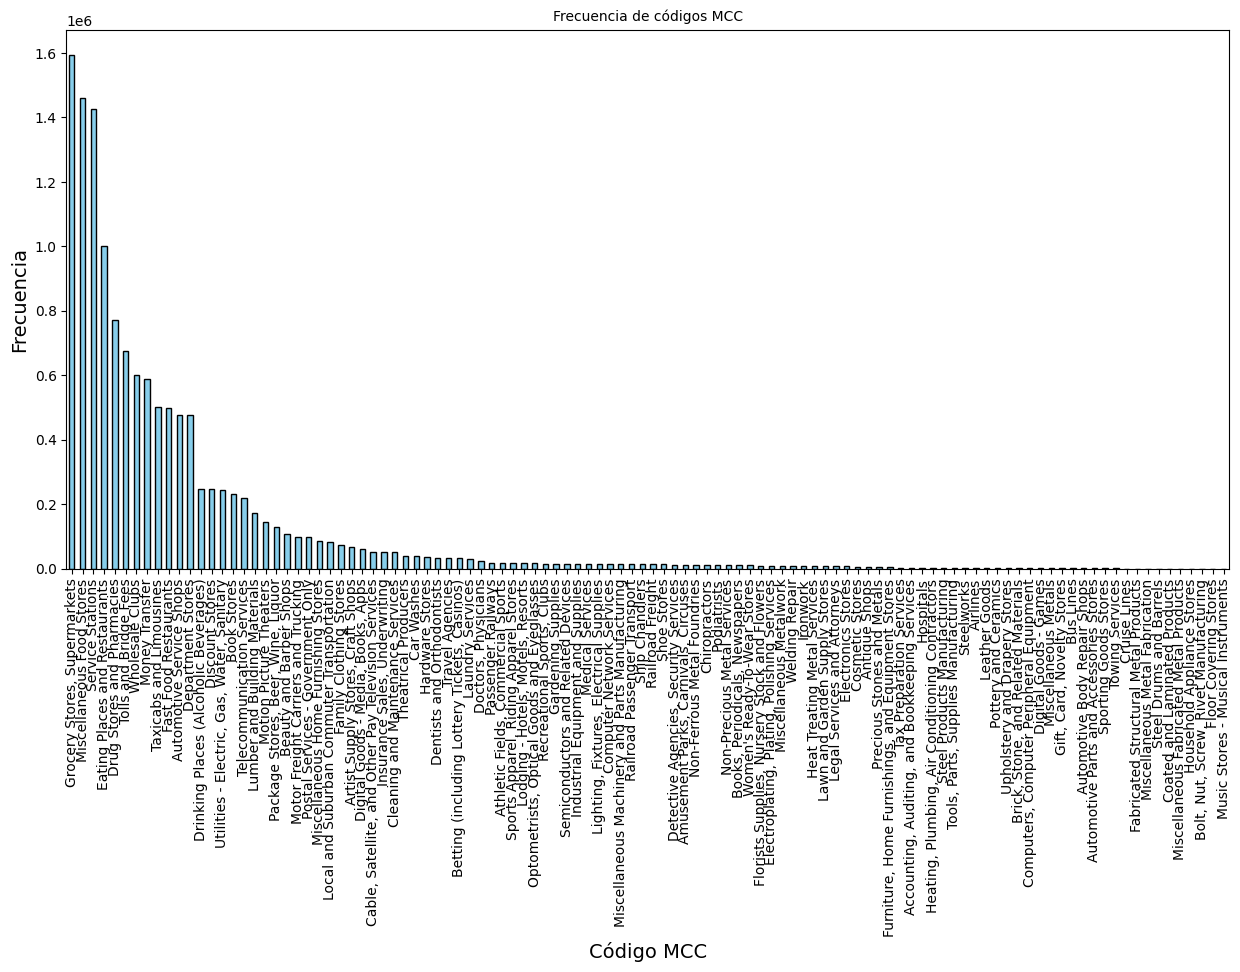

In [23]:
df_transactions["mcc_code"].value_counts().plot(kind='bar', figsize=(15, 7), color='skyblue', edgecolor='black')
plt.title('Frecuencia de códigos MCC', fontsize=10)
plt.xlabel('Código MCC', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=90)
plt.show()

## Se buscan las columnas que **no se consideran relevantes** para entrenar el modelo para eliminarlas y cuales son variables categoricas para combertirlas al modo **One hot encoding**

In [24]:
df_transactions.head(5)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,mcc_code
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.00,5499,NaN,Mastercard,Debit (Prepaid),5497590243197280,07/2022,306,YES,2,$55,05/2008,2008,No,30,67,1989,7,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.00,5311,NaN,Mastercard,Credit,5175842699412235,12/2024,438,YES,1,$9100,09/2005,2015,No,48,67,1971,6,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.00,4829,NaN,Mastercard,Debit,5874992802287595,05/2020,256,YES,1,$14802,01/2006,2008,No,49,65,1970,4,Male,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3,Money Transfer
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.00,4829,NaN,Mastercard,Debit,5346827663529174,10/2024,54,NO,2,$37634,05/2004,2006,No,52,67,1967,5,Female,903 Hill Boulevard,41.42,-87.35,$26168,$53350,$128676,685,5,Money Transfer
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.00,5813,NaN,Visa,Debit,4354185735186651,01/2020,120,YES,1,$19113,07/2009,2014,No,51,69,1968,5,Male,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2,Drinking Places (Alcoholic Beverages)


### Columnas a eliminar ya que se considera que no aportan para el entrenamiento del modelo

- id
- card_number
- expires
- cvv
- card_on_dark_web
- year_pin_last_changed
- address


In [25]:
# Creamos un nuevo dataframe para almacenar los datos transformados
datosOHE = pd.DataFrame()

#Comenzamos con la columna de fecha
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

datosOHE = pd.concat([datosOHE, df_transactions['date'].dt.year], axis=1)
datosOHE.rename(columns = {'date': 'transaction_year'}, inplace=True)

datosOHE = pd.concat([datosOHE, df_transactions['date'].dt.month], axis=1)
datosOHE.rename(columns = {'date': 'transaction_month'}, inplace=True)

datosOHE = pd.concat([datosOHE, df_transactions['date'].dt.day], axis=1)
datosOHE.rename(columns = {'date': 'transaction_day'}, inplace=True)

datosOHE = pd.concat([datosOHE, df_transactions['date'].dt.weekday], axis=1)
datosOHE.rename(columns = {'date': 'transaction_weekday'}, inplace=True)

datosOHE = pd.concat([datosOHE, df_transactions['date'].dt.hour], axis=1)
datosOHE.rename(columns = {'date': 'transaction_hour'}, inplace=True)

# Agregamos la columna de client_id
datosOHE = pd.concat([datosOHE, df_transactions['client_id']], axis=1)

# agregamos la columna card_id
datosOHE = pd.concat([datosOHE, df_transactions['card_id']], axis=1)

# agregamos la columna use_chip
df_temp = pd.get_dummies(df_transactions['use_chip'], prefix='use_chip')
df_temp = df_temp.astype('int')
datosOHE = pd.concat([datosOHE, df_temp], axis=1)

# Agregamos la columna merchant_id
datosOHE = pd.concat([datosOHE, df_transactions['merchant_id']], axis=1)

# Agregar la columna merchant_city_freq
# Calcular la frecuencia de cada ciudad y asignar el porcentaje a cada fila
df_transactions.loc[df_transactions['merchant_city'].isnull(), ['merchant_city']] = 0
frecuencia = df_transactions['merchant_city'].value_counts() / len(df_transactions) * 100
df_transactions['merchant_city_freq'] = df_transactions['merchant_city'].map(frecuencia)
df_transactions['merchant_city_freq'] = df_transactions['merchant_city_freq'].astype('float64')
datosOHE = pd.concat([datosOHE, df_transactions['merchant_city_freq']], axis=1)

# Agregar la columna merchant_state_freq
# Calcular la frecuencia de cada ciudad y asignar el porcentaje a cada fila
df_transactions.loc[df_transactions['merchant_state'].isnull(), ['merchant_state']] = 0
frecuencia = df_transactions['merchant_state'].value_counts() / len(df_transactions) * 100
df_transactions['merchant_state_freq'] = df_transactions['merchant_state'].map(frecuencia)
df_transactions['merchant_state_freq'] = df_transactions['merchant_state_freq'].astype('float64')
datosOHE = pd.concat([datosOHE, df_transactions['merchant_state_freq']], axis=1)

# Agregamos la columna zip
df_transactions.loc[df_transactions['zip'].isnull(), ['zip']] = 0
df_transactions['zip'] = df_transactions['zip'].astype('int64')
datosOHE = pd.concat([datosOHE, df_transactions['zip']], axis=1)

# Agregamos la columna mcc
df_transactions.mcc = df_transactions.mcc.astype('int64')
datosOHE = pd.concat([datosOHE, df_transactions['mcc']], axis=1)

# Agregamos la columna errors
# Calcular la frecuencia de cada ciudad y asignar el porcentaje a cada fila
df_transactions.loc[df_transactions['errors'].isnull(), ['errors']] = 0
frecuencia = df_transactions['errors'].value_counts() / len(df_transactions) * 100
df_transactions['errors_freq'] = df_transactions['errors'].map(frecuencia)
df_transactions['errors_freq'] = df_transactions['errors_freq'].astype('float64')
datosOHE = pd.concat([datosOHE, df_transactions['errors_freq']], axis=1)


# Agregamos la columna card_brand	
df_temp = pd.get_dummies(df_transactions['card_brand'], prefix='card_brand')
df_temp = df_temp.astype('int')
datosOHE = pd.concat([datosOHE, df_temp], axis=1)

# Agregamos la columna card_type
df_temp = pd.get_dummies(df_transactions['card_type'], prefix='card_type')
df_temp = df_temp.astype('int')
datosOHE = pd.concat([datosOHE, df_temp], axis=1)

# Agregamos la columna has_chip
df_transactions.loc[df_transactions['has_chip'] == 'YES', ['has_chip']] = 1
df_transactions.loc[df_transactions['has_chip'] == 'NO', ['has_chip']] = 0
df_transactions['has_chip'] = df_transactions['has_chip'].astype('int')
datosOHE = pd.concat([datosOHE, df_transactions['has_chip']], axis=1)

# Agregar la columna num_cards_issued
datosOHE = pd.concat([datosOHE, df_transactions['num_cards_issued']], axis=1)

# Agregamos la columna credit_limit
df_transactions['credit_limit'] = df_transactions['credit_limit'].str.replace('$', '', regex=False)
df_transactions['credit_limit'] = df_transactions['credit_limit'].astype('int64')
datosOHE = pd.concat([datosOHE, df_transactions['credit_limit']], axis=1)

# Agregamos la columna acct_open_date
df_transactions['acct_open_date'] = pd.to_datetime(df_transactions['acct_open_date'])

datosOHE = pd.concat([datosOHE, df_transactions['acct_open_date'].dt.year], axis=1)
datosOHE.rename(columns = {'acct_open_date': 'acct_open_date_year'}, inplace=True)

datosOHE = pd.concat([datosOHE, df_transactions['acct_open_date'].dt.month], axis=1)
datosOHE.rename(columns = {'acct_open_date': 'acct_open_date_month'}, inplace=True)


# agregamos la columna current_age
datosOHE = pd.concat([datosOHE, df_transactions['current_age']], axis=1)

# Agregamos la columna retirement_age
datosOHE = pd.concat([datosOHE, df_transactions['retirement_age']], axis=1)

# Agregamos la columna birth_year
datosOHE = pd.concat([datosOHE, df_transactions['birth_year']], axis=1)

# Agregamos la columna birth_month
datosOHE = pd.concat([datosOHE, df_transactions['birth_month']], axis=1)

# Agregamos la columna gender
df_temp = pd.get_dummies(df_transactions['gender'], prefix='gender')
df_temp = df_temp.astype('int')
datosOHE = pd.concat([datosOHE, df_temp], axis=1)

# Agregamos la columna latitude
datosOHE = pd.concat([datosOHE, df_transactions['latitude']], axis=1)

# Agregamos la columna longitude
datosOHE = pd.concat([datosOHE, df_transactions['longitude']], axis=1)

# Agregamos la columna per_capita_income
df_transactions['per_capita_income'] = df_transactions['per_capita_income'].str.replace('$', '', regex=False)
df_transactions['per_capita_income'] = df_transactions['per_capita_income'].astype('int64')
datosOHE = pd.concat([datosOHE, df_transactions['per_capita_income']], axis=1)

# Agregamos la columna yearly_income
df_transactions['yearly_income'] = df_transactions['yearly_income'].str.replace('$', '', regex=False)
df_transactions['yearly_income'] = df_transactions['yearly_income'].astype('int64')
datosOHE = pd.concat([datosOHE, df_transactions['yearly_income']], axis=1)

# Agregamos la columna total_debt
df_transactions['total_debt'] = df_transactions['total_debt'].str.replace('$', '', regex=False)
df_transactions['total_debt'] = df_transactions['total_debt'].astype('int64')
datosOHE = pd.concat([datosOHE, df_transactions['total_debt']], axis=1)

# Agregamos la columna credit_score
datosOHE = pd.concat([datosOHE, df_transactions['credit_score']], axis=1)

# Agregamos la columna num_credit_cards
datosOHE = pd.concat([datosOHE, df_transactions['num_credit_cards']], axis=1)

# Agregamos la columna amount (Variable objetivo)
df_transactions['amount'] = df_transactions['amount'].replace('[\$,]', '', regex=True).astype(float)
datosOHE = pd.concat([datosOHE, df_transactions['amount']], axis=1)

/var/folders/8x/5p9cvh4d49qgkn3cz5n31dc80000gn/T/ipykernel_81256/4197055153.py:95: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_transactions['acct_open_date'] = pd.to_datetime(df_transactions['acct_open_date'])


In [26]:
datosOHE

,transaction_year,transaction_month,transaction_day,transaction_weekday,transaction_hour,client_id,card_id,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction,merchant_id,merchant_city_freq,merchant_state_freq,zip,mcc,errors_freq,card_brand_Amex,card_brand_Discover,card_brand_Mastercard,card_brand_Visa,card_type_Credit,card_type_Debit,card_type_Debit (Prepaid),has_chip,num_cards_issued,credit_limit,acct_open_date_year,acct_open_date_month,current_age,retirement_age,birth_year,birth_month,gender_Female,gender_Male,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,amount
0,2010,1,1,4,0,1556,2972,0,0,1,59935,0.01,0.17,58523,5499,98.41,0,0,1,0,0,0,1,1,2,55,2008,5,30,67,1989,7,1,0,46.80,-100.76,23679,48277,110153,740,4,-77.00
1,2010,1,1,4,0,561,4575,0,0,1,67570,0.00,1.21,52722,5311,98.41,0,0,1,0,1,0,0,1,1,9100,2005,9,48,67,1971,6,0,1,40.80,-91.12,18076,36853,112139,834,5,14.57
2,2010,1,1,4,0,1129,102,0,0,1,27092,0.05,10.73,92084,4829,98.41,0,0,1,0,0,1,0,1,1,14802,2006,1,49,65,1970,4,0,1,33.18,-117.29,16894,34449,36540,686,3,80.00
3,2010,1,1,4,0,430,2860,0,0,1,27092,0.13,2.35,46307,4829,98.41,0,0,1,0,0,1,0,0,2,37634,2004,5,52,67,1967,5,1,0,41.42,-87.35,26168,53350,128676,685,5,200.00
4,2010,1,1,4,0,848,3915,0,0,1,13051,0.02,1.46,20776,5813,98.41,0,0,0,1,0,1,0,1,1,19113,2009,7,51,69,1968,5,0,1,38.86,-76.60,33529,68362,96182,711,2,46.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,2019,10,31,3,23,1718,2379,1,0,0,86438,0.07,10.73,91792,5499,98.41,0,0,1,0,0,1,0,1,1,26743,2019,3,81,67,1938,11,1,0,34.02,-117.89,22681,33483,196,698,5,1.11
13305911,2019,10,31,3,23,1766,2066,0,1,0,39261,11.75,11.75,0,5815,98.41,0,0,1,0,0,1,0,1,1,5141,2004,3,62,66,1957,9,0,1,43.06,-87.96,9995,20377,12092,789,4,12.80
13305912,2019,10,31,3,23,199,1031,0,0,1,2925,0.09,7.59,75002,4900,98.41,0,0,1,0,0,1,0,1,1,17686,2004,2,67,67,1952,4,1,0,33.10,-96.66,32580,78329,40161,720,3,40.44
13305913,2019,10,31,3,23,1986,5443,1,0,0,46284,0.04,10.73,94014,5411,98.41,0,0,0,1,0,1,0,1,2,14036,2005,11,44,69,1975,12,1,0,37.68,-122.43,23752,48430,62384,716,2,4.00


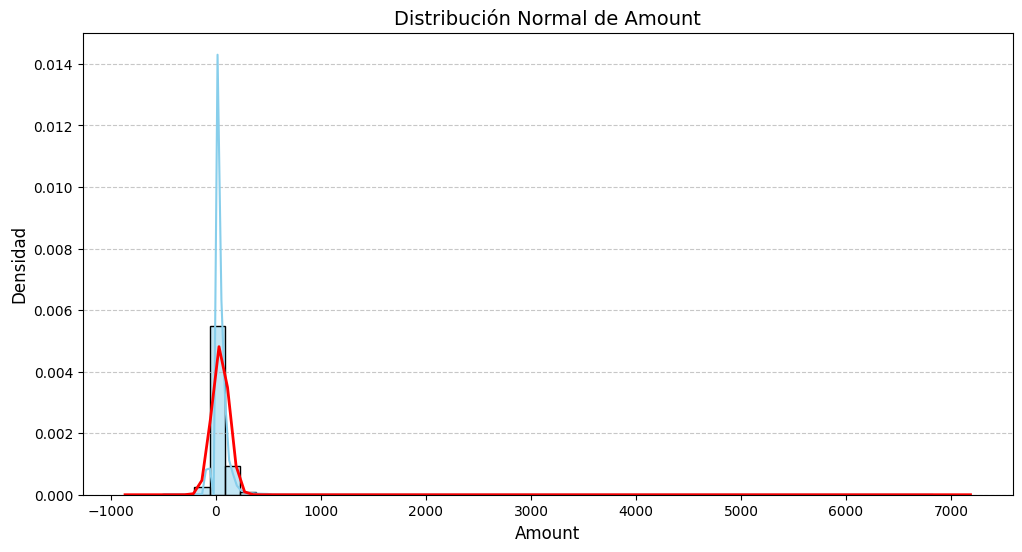

In [30]:
import seaborn as sns
from scipy.stats import norm
import numpy as np

# Graficar la distribución normal ajustada
plt.figure(figsize=(12, 6))
sns.histplot(df_transactions['amount'], bins=50, kde=True, stat="density", color='skyblue', edgecolor='black')

# Ajustar una curva de distribución normal
mean, std = norm.fit(df_transactions['amount'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)

# Configurar el gráfico
plt.title('Distribución Normal de Amount', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
df_transactions['amount'].describe()

count   13305915.00
mean          42.98
std           81.66
min         -500.00
25%            8.93
50%           28.99
75%           63.71
max         6820.20
Name: amount, dtype: float64

### La primera opcion eliminar los valores negativos de la columna amount y luego aplicar una transfaormación logaritmica para minimizar el sesgo hacia la derecha por los valores de transacciones muy grandes

In [ ]:
datosOHE_positivos = datosOHE.loc[datosOHE['amount'] >= 0].copy()

In [39]:
datosOHE_positivos.loc[datosOHE_positivos['amount'] == 0, ['amount']]

,amount
2323,0.00
2590,0.00
5913,0.00
9186,0.00
10437,0.00
...,...
13300857,0.00
13301091,0.00
13303868,0.00
13305150,0.00


In [40]:
datosOHE_positivos['log_amount'] = np.log1p(datosOHE_positivos['amount'])

/var/folders/8x/5p9cvh4d49qgkn3cz5n31dc80000gn/T/ipykernel_81256/2043726017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosOHE_positivos['log_amount'] = np.log1p(datosOHE_positivos['amount'])


In [44]:
datosOHE_positivos

,transaction_year,transaction_month,transaction_day,transaction_weekday,transaction_hour,client_id,card_id,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction,merchant_id,merchant_city_freq,merchant_state_freq,zip,mcc,errors_freq,card_brand_Amex,card_brand_Discover,card_brand_Mastercard,card_brand_Visa,card_type_Credit,card_type_Debit,card_type_Debit (Prepaid),has_chip,num_cards_issued,credit_limit,acct_open_date_year,acct_open_date_month,current_age,retirement_age,birth_year,birth_month,gender_Female,gender_Male,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,log_amount
1,2010,1,1,4,0,561,4575,0,0,1,67570,0.00,1.21,52722,5311,98.41,0,0,1,0,1,0,0,1,1,9100,2005,9,48,67,1971,6,0,1,40.80,-91.12,18076,36853,112139,834,5,2.75
2,2010,1,1,4,0,1129,102,0,0,1,27092,0.05,10.73,92084,4829,98.41,0,0,1,0,0,1,0,1,1,14802,2006,1,49,65,1970,4,0,1,33.18,-117.29,16894,34449,36540,686,3,4.39
3,2010,1,1,4,0,430,2860,0,0,1,27092,0.13,2.35,46307,4829,98.41,0,0,1,0,0,1,0,0,2,37634,2004,5,52,67,1967,5,1,0,41.42,-87.35,26168,53350,128676,685,5,5.30
4,2010,1,1,4,0,848,3915,0,0,1,13051,0.02,1.46,20776,5813,98.41,0,0,0,1,0,1,0,1,1,19113,2009,7,51,69,1968,5,0,1,38.86,-76.60,33529,68362,96182,711,2,3.86
5,2010,1,1,4,0,1807,165,0,0,1,20519,0.39,6.44,10464,5942,98.41,0,0,1,0,0,0,1,1,1,89,2008,1,47,65,1972,12,1,0,40.84,-73.87,25537,52065,98613,828,5,1.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,2019,10,31,3,23,1718,2379,1,0,0,86438,0.07,10.73,91792,5499,98.41,0,0,1,0,0,1,0,1,1,26743,2019,3,81,67,1938,11,1,0,34.02,-117.89,22681,33483,196,698,5,0.75
13305911,2019,10,31,3,23,1766,2066,0,1,0,39261,11.75,11.75,0,5815,98.41,0,0,1,0,0,1,0,1,1,5141,2004,3,62,66,1957,9,0,1,43.06,-87.96,9995,20377,12092,789,4,2.62
13305912,2019,10,31,3,23,199,1031,0,0,1,2925,0.09,7.59,75002,4900,98.41,0,0,1,0,0,1,0,1,1,17686,2004,2,67,67,1952,4,1,0,33.10,-96.66,32580,78329,40161,720,3,3.72
13305913,2019,10,31,3,23,1986,5443,1,0,0,46284,0.04,10.73,94014,5411,98.41,0,0,0,1,0,1,0,1,2,14036,2005,11,44,69,1975,12,1,0,37.68,-122.43,23752,48430,62384,716,2,1.61


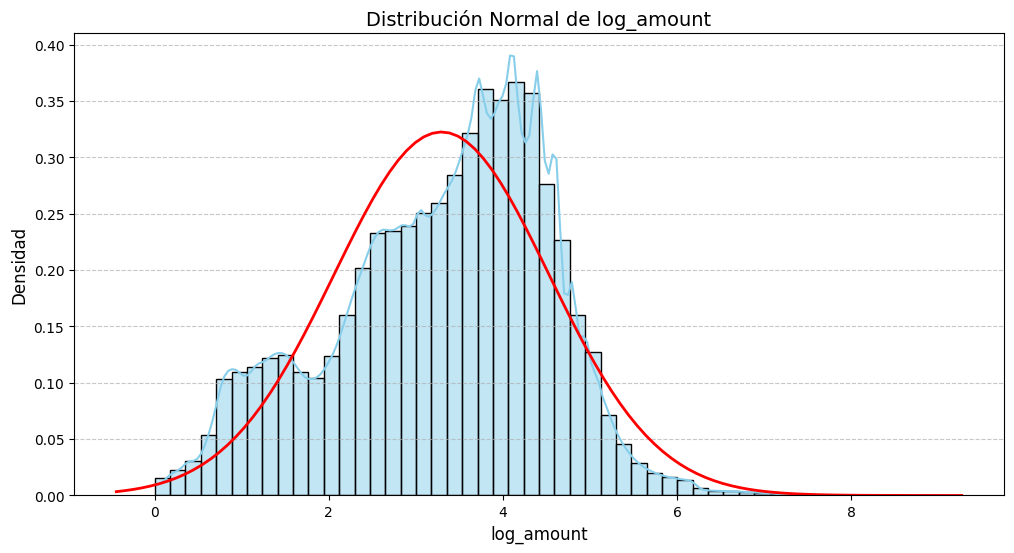

In [42]:
# Graficar la distribución normal ajustada para log_amount
plt.figure(figsize=(12, 6))
sns.histplot(datosOHE_positivos['log_amount'], bins=50, kde=True, stat="density", color='skyblue', edgecolor='black')

# Ajustar una curva de distribución normal
mean_log, std_log = norm.fit(datosOHE_positivos['log_amount'])
xmin_log, xmax_log = plt.xlim()
x_log = np.linspace(xmin_log, xmax_log, 100)
p_log = norm.pdf(x_log, mean_log, std_log)
plt.plot(x_log, p_log, 'r', linewidth=2)

# Configurar el gráfico
plt.title('Distribución Normal de log_amount', fontsize=14)
plt.xlabel('log_amount', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
datosOHE_positivos.drop(columns=['amount'], inplace=True)

/var/folders/8x/5p9cvh4d49qgkn3cz5n31dc80000gn/T/ipykernel_81256/1159771206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosOHE_positivos.drop(columns=['amount'], inplace=True)


In [47]:
datosOHE_positivos.sample(n=500000).to_csv(r'/Users/edissonpenagosospina/Downloads/dataSet_muestra.csv', index=False)

In [46]:
datosOHE_positivos.to_csv(r'/Users/edissonpenagosospina/Downloads/dataSet.csv', index=False)